<h1><b><font color="Red">STOCK PRICE PREDICTION</font></b></h1>

<h2><b>Loading Required Libaries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import yfinance as yf

In [55]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

<h2><b>Loading the DataSet 

In [56]:
stock = ['GOOG', 'AAPL', 'MSFT', 'HDB', 'NVDA', 'TSLA', 'QS', 'IBM']
google_data = yf.download(stock[0], start, end)             #Stock data of google
apple_data = yf.download(stock[1], start, end)              #Stock data of apple
ms_data = yf.download(stock[2], start, end)                 #Stock data of Microsoft
hdfc_data = yf.download(stock[3], start, end)               #Stock data of HDFC
nvida_data = yf.download(stock[4], start, end)              #Stock data of NVIDIA
tesla_data = yf.download(stock[5], start, end)              #Stock data of TESLA
qs_data = yf.download(stock[6], start, end)                 #Stock data of QuantumScape Corporation
ibm_data = yf.download(stock[7], start, end)                #Stock data of IBM


data = pd.concat([google_data, apple_data, ms_data, hdfc_data, nvida_data, tesla_data, qs_data, ibm_data], axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [57]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-24,4.354179,4.413706,4.296645,4.352685,4.342021,613531078
2004-11-26,4.378588,4.483943,4.366633,4.468003,4.457057,260175560
2004-11-29,4.492162,4.556670,4.421178,4.509348,4.498301,428263241
2004-11-30,4.500880,4.557916,4.489423,4.532511,4.521408,309154460
2004-12-01,4.531764,4.545462,4.471988,4.482200,4.471220,315743063


In [58]:
data.describe()                         #To get the description of the data

,Open,High,Low,Close,Adj Close,Volume
count,34907.000000,34907.000000,34907.000000,34907.000000,34907.000000,3.490700e+04
mean,64.147982,64.878483,63.411560,64.165430,57.086058,1.688072e+08
std,77.228354,78.126249,76.297245,77.239374,72.702660,2.846528e+08
min,0.150000,0.159500,0.143750,0.147500,0.135279,9.000000e+02
25%,10.999101,11.198420,10.813166,11.012804,10.366504,6.000554e+06
50%,28.641365,28.930000,28.330000,28.620001,25.333490,4.477520e+07
75%,105.033253,106.547352,103.792927,105.220001,80.217815,1.969819e+08
max,467.000000,468.350006,464.459991,467.559998,465.786438,3.692928e+09


In [59]:
data.info()                 #Get the information of the data set

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34907 entries, 2004-11-24 to 2024-11-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       34907 non-null  float64
 1   High       34907 non-null  float64
 2   Low        34907 non-null  float64
 3   Close      34907 non-null  float64
 4   Adj Close  34907 non-null  float64
 5   Volume     34907 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [60]:
data.isna().sum()           #To check the numbler of null values in each column and add their sum

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<h2><b> Data Analysis

<p><i>Here the DataSet is the clean, It has no null values.

Text(0.5, 1.0, 'Closing price of Data')

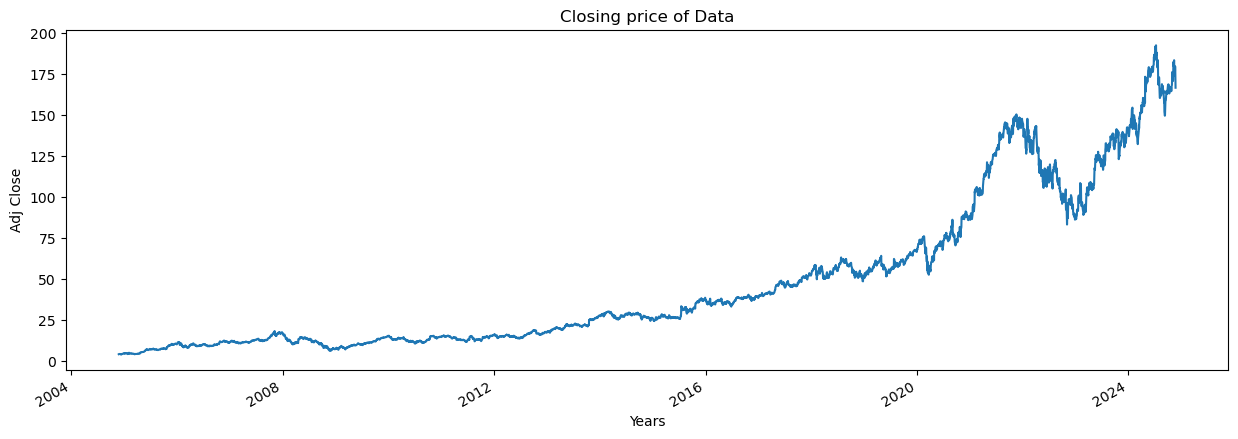

In [61]:
plt.figure(figsize = (15,5))

google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of Data")

In [62]:
def plot_graph(figsize,values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f" {column_name} of Google Data")


In [63]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

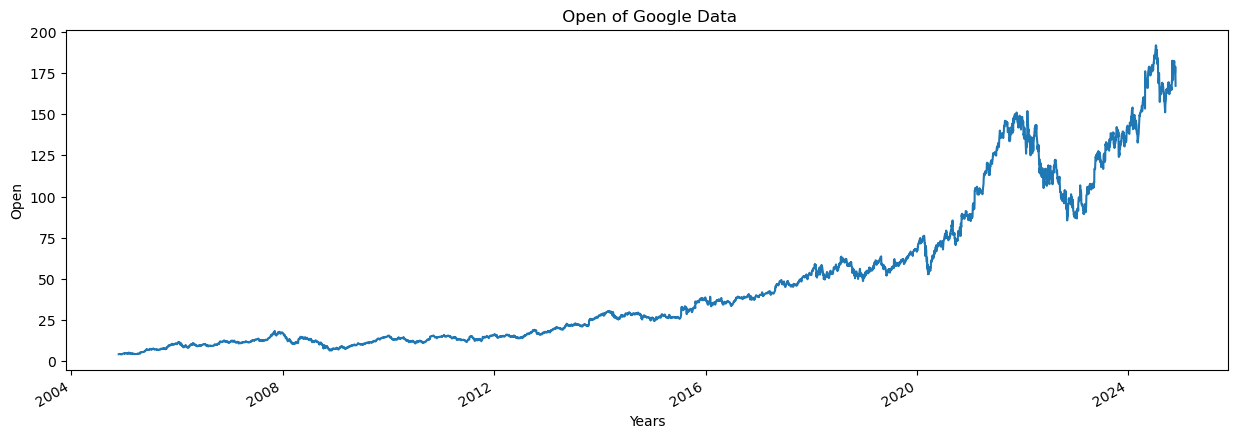

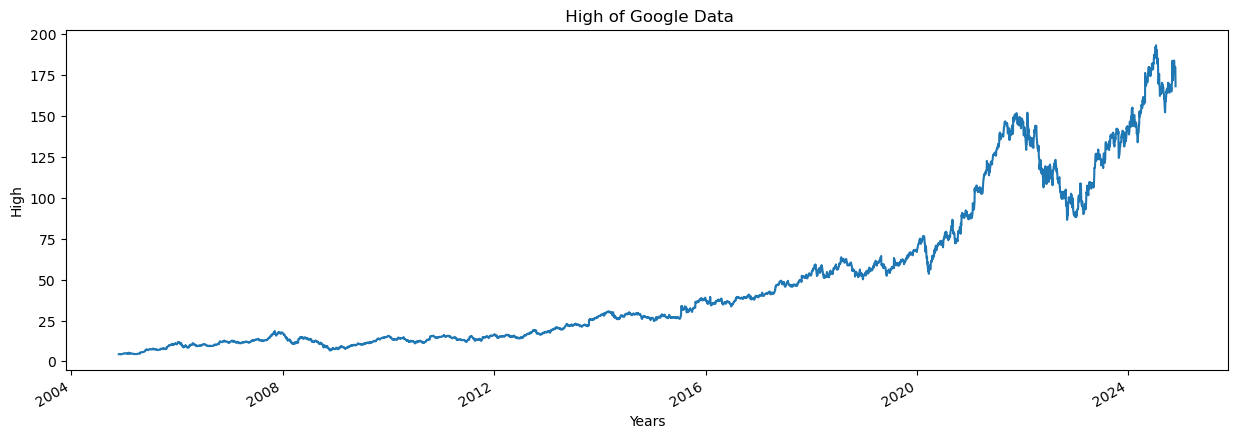

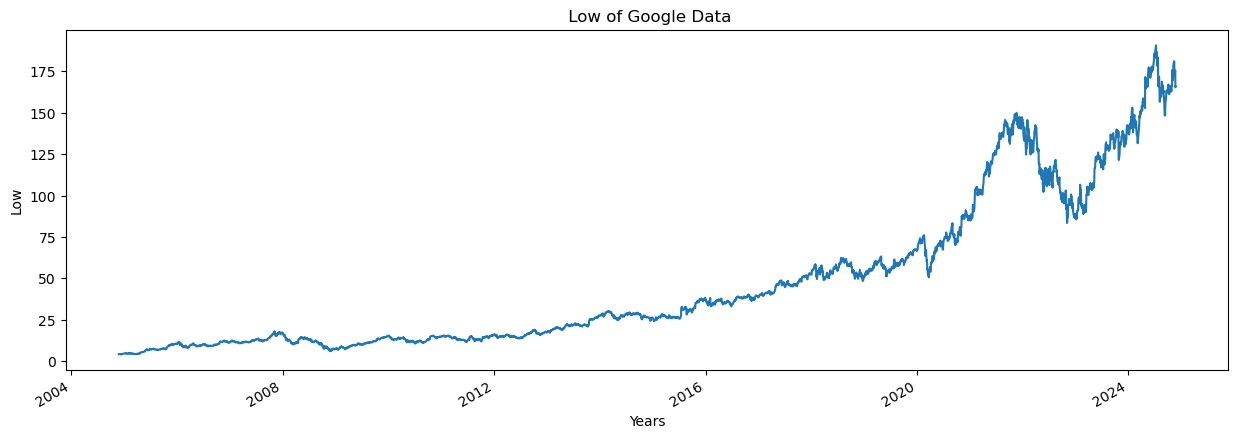

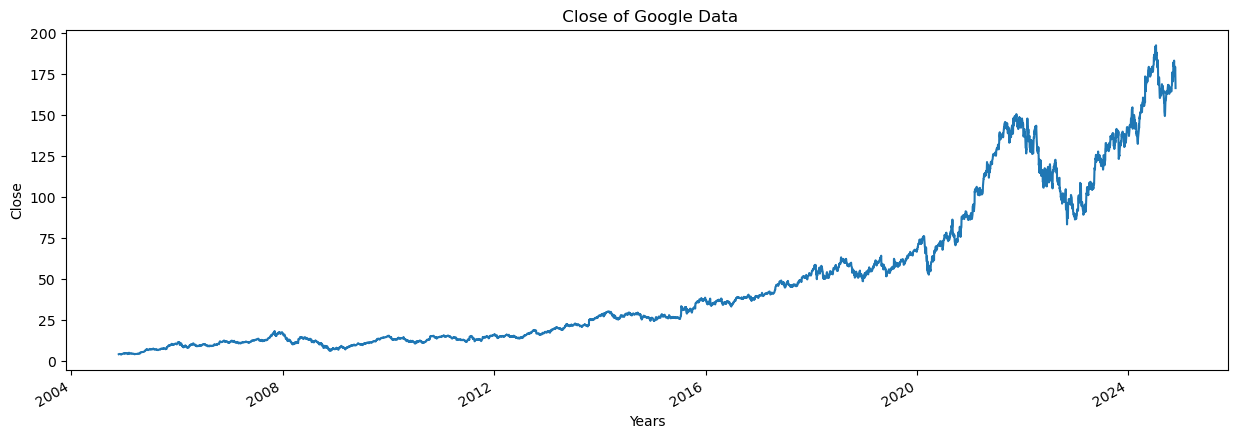

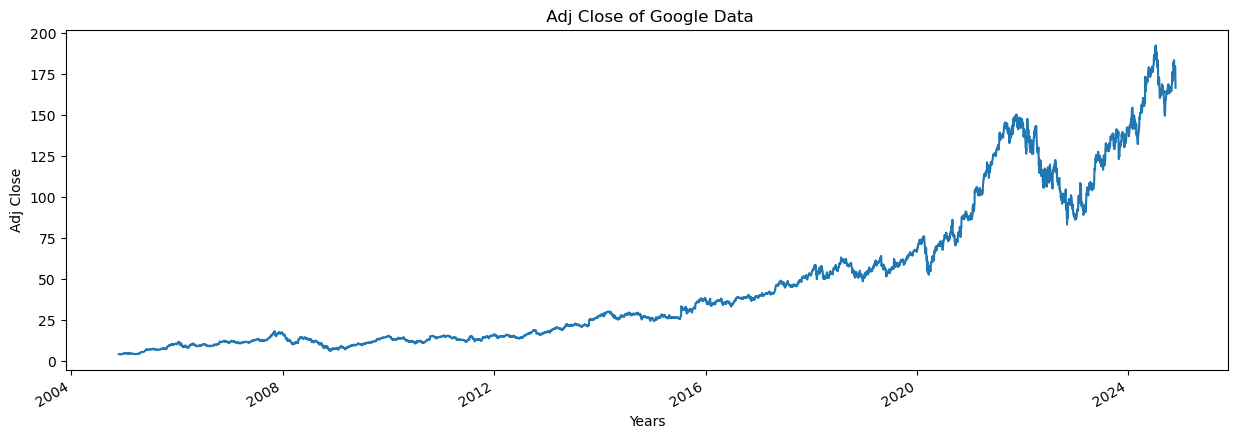

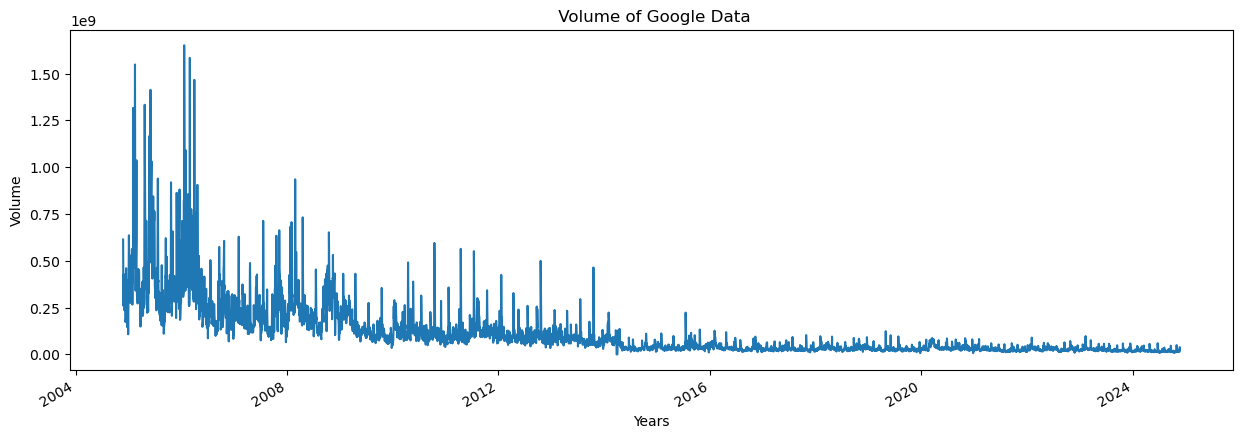

In [64]:
for column in google_data.columns:
    plot_graph(figsize = (15,5), values = google_data[column], column_name = column)
    

In [65]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [66]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head

<bound method NDFrame.head of      0
0   10
1   20
2   30
3   40
4   50
5   60
6   70
7   80
8   90
9  100>

In [67]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [68]:
for i in range(2004, 2024):
    print(i, list(google_data.index.year).count(i))

2004 26
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [69]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [70]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-11-14         NaN
2005-11-15         NaN
2005-11-16         NaN
2005-11-17         NaN
2005-11-18    6.261514
Name: MA_for_250_days, dtype: float64

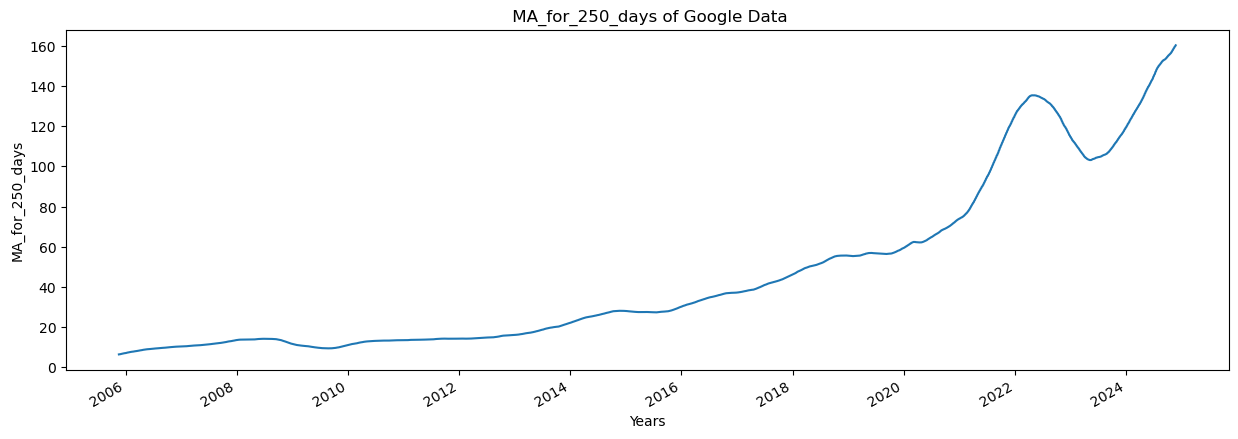

In [71]:
plot_graph((15, 5), google_data['MA_for_250_days'], 'MA_for_250_days')

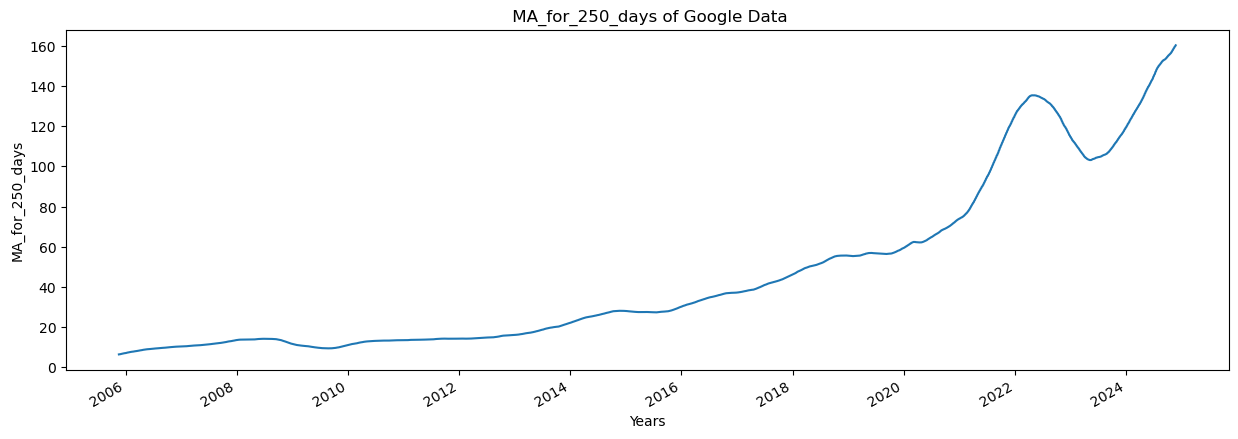

In [72]:
plot_graph((15, 5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

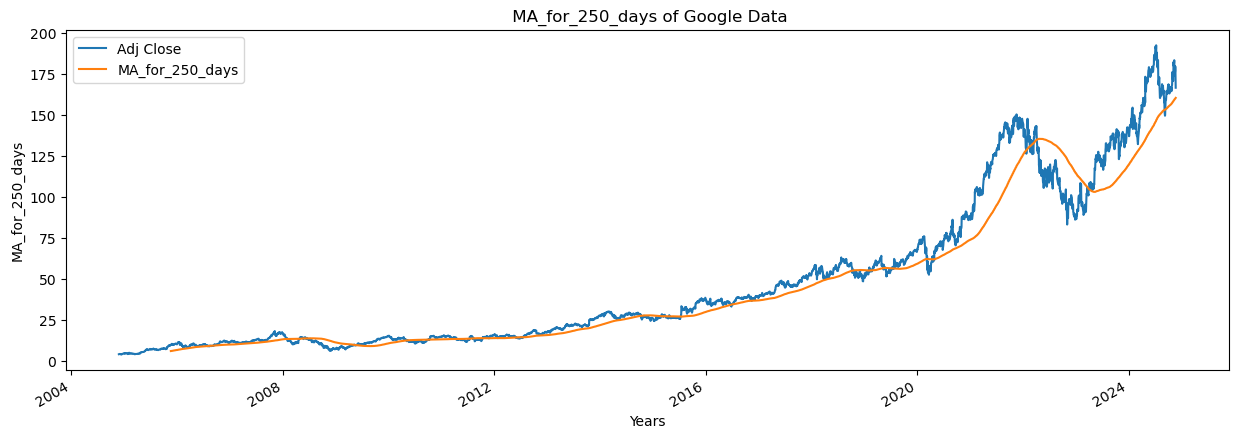

In [73]:
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<h3><i>Here the orange curve is the moving average and It started after few days because moving average is null for the first 249 rows

<Figure size 640x480 with 0 Axes>

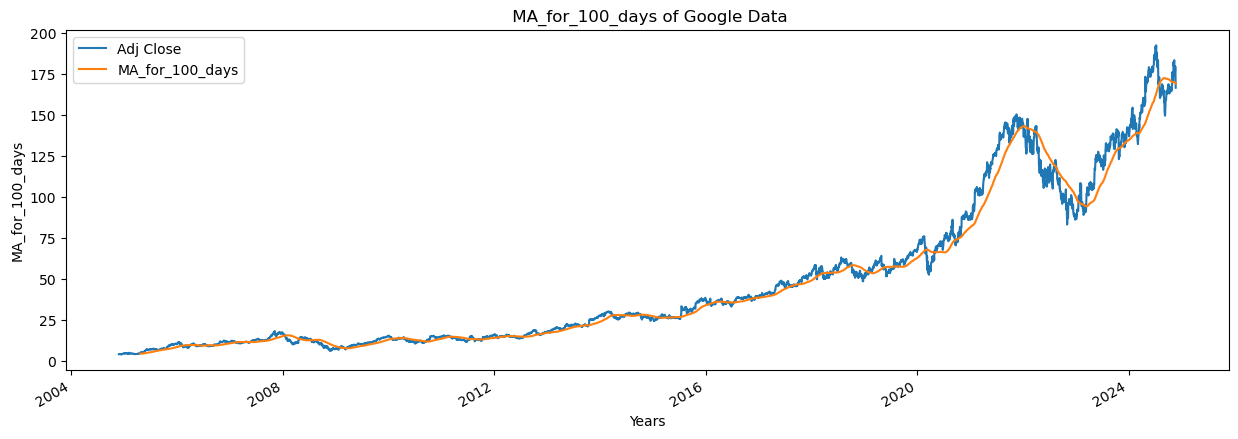

In [74]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

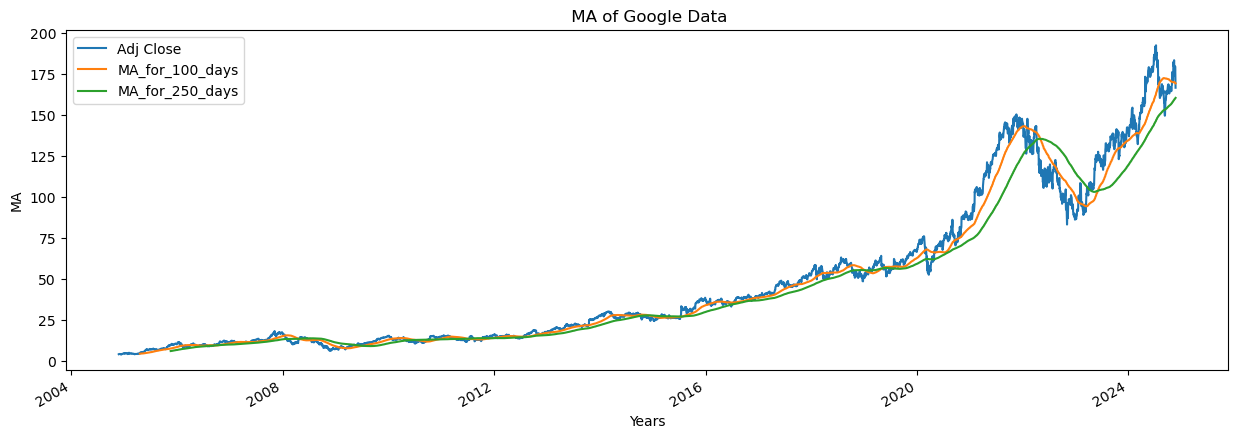

In [75]:
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']] , 'MA')

In [76]:
#Percentage change

google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-11-24,4.342021,NaN
2004-11-26,4.457057,0.026494
2004-11-29,4.498301,0.009254
2004-11-30,4.521408,0.005137
2004-12-01,4.471220,-0.011100


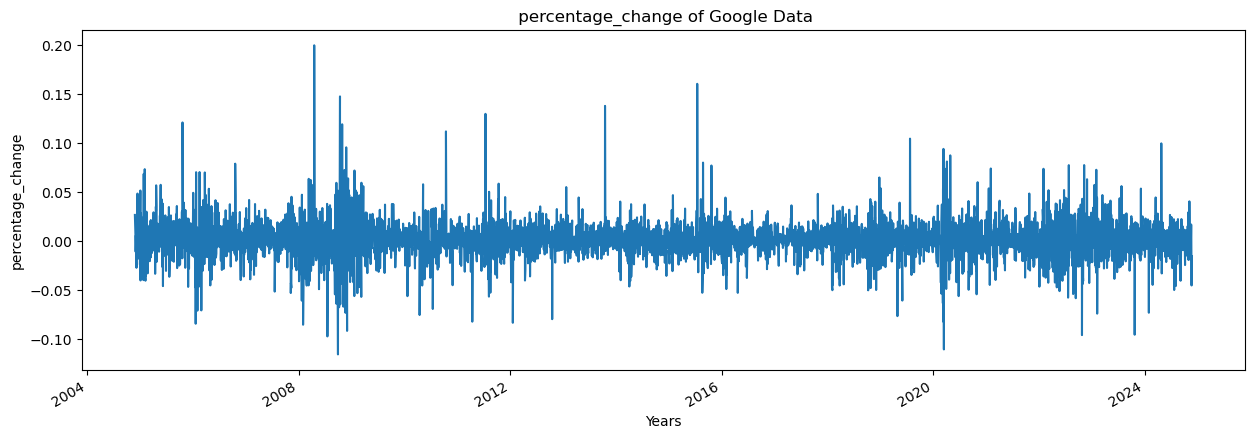

In [77]:
plot_graph((15, 5), google_data['percentage_change_cp'], 'percentage_change')

<h3><i> Percentage change of google data throughout the years

<h2><b> Data PreProcessing

<i><h3>Now we are gonna Preprocess the close price data. Our goal is to normalise the input data that is the close price data.

>Normalise :: Convert this data in the range of 0 to 1. This will help to train our model faster.



In [78]:
Adj_close_price = google_data[['Adj Close']]

In [79]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([192.40672302]), array([4.22325945]))

In [80]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler_data = scaler.fit_transform(Adj_close_price.values)
scaler_data

array([[6.31096984e-04],
       [1.24239158e-03],
       [1.46156084e-03],
       ...,
       [9.19882858e-01],
       [8.76892916e-01],
       [8.62704644e-01]])

In [81]:
len(scaler_data)

5034

In [82]:
x_data = []
y_data = []

#Moving average concept here

for i in range(100, len(scaler_data)):
    x_data.append(scaler_data[i-100:i])
    y_data.append(scaler_data[i])
    
x_data, y_data = np.array(x_data), np.array(y_data)
# x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [83]:
x_data[0], y_data[0]

(array([[6.31096984e-04],
        [1.24239158e-03],
        [1.46156084e-03],
        [1.58434832e-03],
        [1.31765333e-03],
        [1.24371427e-03],
        [1.37574034e-03],
        [8.33099102e-04],
        [1.91443377e-04],
        [0.00000000e+00],
        [4.55500587e-04],
        [2.20489417e-04],
        [6.20525574e-05],
        [1.14997282e-03],
        [1.29388033e-03],
        [8.56867038e-04],
        [1.33348764e-03],
        [1.98571224e-03],
        [1.81803933e-03],
        [2.15471291e-03],
        [2.36595361e-03],
        [2.89539072e-03],
        [3.00761947e-03],
        [3.02610170e-03],
        [3.64663741e-03],
        [3.01157995e-03],
        [4.32130472e-03],
        [3.23734494e-03],
        [3.10663902e-03],
        [2.45177664e-03],
        [3.15152951e-03],
        [3.31128399e-03],
        [3.11059950e-03],
        [3.35353163e-03],
        [3.34693083e-03],
        [3.95954812e-03],
        [4.47841889e-03],
        [3.60702756e-03],
        [3.1

In [84]:
int(len(x_data)*0.7)

3453

In [85]:
5034-100-int(len(x_data)*0.7)

1481

In [86]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]


x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


<b><h2> Neural Network Model using keras


In [88]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [89]:
model  = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
model.compile(optimizer='adam', loss='mean_squared_error') #PROVIDE VALIDATION ARGUMENT HERE

In [114]:
from keras.callbacks import EarlyStopping # type: ignore

early_stopping = EarlyStopping(monitor='val_loss', patience=7, min_delta=0.0125, mode='min')

model.fit(x_train, y_train, 
          batch_size=32, 
          epochs=200, 
          validation_data=(x_test, y_test), 
          callbacks=[early_stopping], 
          )

Epoch 1/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 1.1940e-05 - val_loss: 4.2612e-04
Epoch 2/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 1.1295e-05 - val_loss: 2.2764e-04
Epoch 3/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 1.5688e-05 - val_loss: 4.4503e-04
Epoch 4/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 1.1859e-05 - val_loss: 2.0283e-04
Epoch 5/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 9.7227e-06 - val_loss: 2.7036e-04
Epoch 6/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 9.8386e-06 - val_loss: 2.4369e-04
Epoch 7/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 1.2213e-05 - val_loss: 5.1680e-04
Epoch 8/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 1.3788e-05 - val_loss: 3.5911e-04


In [106]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

<h3><i> Here the model is trained and it is ready to predict the price.


In [107]:
from sklearn.metrics import *

In [108]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the actual classes to the same format as the predicted classes
actual_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Accuracy: 100.00%


In [109]:
predictions

array([[0.25865042],
       [0.26092547],
       [0.26264665],
       ...,
       [0.9005298 ],
       [0.9000384 ],
       [0.89003557]], dtype=float32)

<h3><i> Now we have to inverse transform them to get out Original Data.


In [115]:
inv_pred = scaler.inverse_transform(predictions)
inv_pred

array([[ 52.89699 ],
       [ 53.32512 ],
       [ 53.649017],
       ...,
       [173.68806 ],
       [173.5956  ],
       [171.71323 ]], dtype=float32)

In [116]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.68216324],
       [ 53.60136414],
       [ 53.38539505],
       ...,
       [177.33000183],
       [169.24000549],
       [166.57000732]])

In [117]:
rmse = np.sqrt(np.mean( (inv_pred - inv_y_test)**2))

In [118]:
rmse

3.042825290262336

<h3><i> The RMSE Value is 3.04 which shows that it has very less error.


In [119]:
ploting_data = pd.DataFrame(
    {
        'original_test_data' : inv_y_test.reshape(-1),
        'predicted_test_data' : inv_pred.reshape(-1)
    },
    index=google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predicted_test_data
Date,,
2019-01-08,53.682163,52.896992
2019-01-09,53.601364,53.325119
2019-01-10,53.385395,53.649017
2019-01-11,52.730007,53.802643
2019-01-14,52.106537,53.698284


<Figure size 640x480 with 0 Axes>

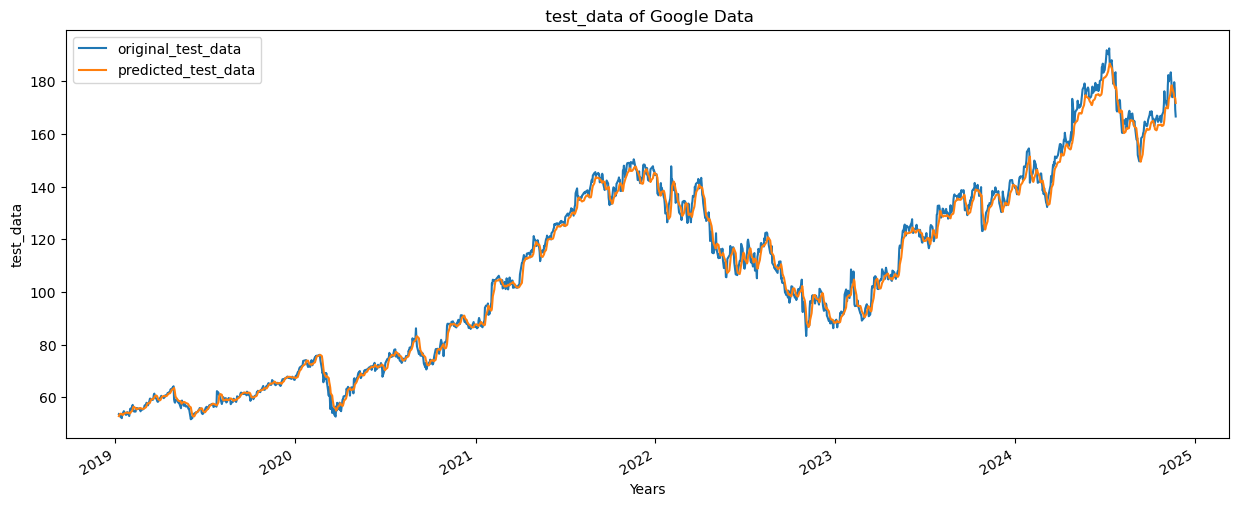

In [120]:
plot_graph((15, 6), ploting_data, 'test_data')

<Figure size 640x480 with 0 Axes>

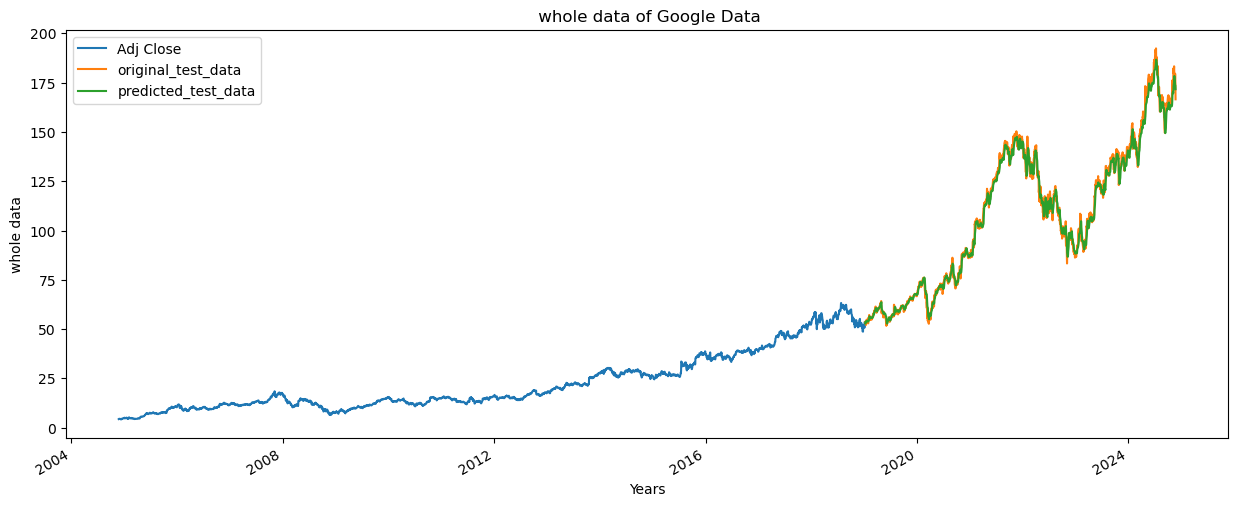

In [121]:
plot_graph((15, 6),pd.concat([Adj_close_price[:splitting_len+100], ploting_data], axis = 0), 'whole data')

In [122]:
model.save("Latest_stock_price_model.keras")                    #Saving the Model